<a href="https://colab.research.google.com/github/elizavetasemenova/SIAM2023_probabilistic_programming/blob/main/SIAM_minitutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Scientific Computing and Probabilistic Programming: inside and outside the “black box” 

Bayesian methods are increasingly important in scientific computing where uncertainties and incomplete information play a role. This mini-tutorial will walk participants through the basic probabilistic concepts to give the understanding of how inverse problems and parameter estimation problems can be recast in the form of Bayesian inference, as well as equip them with hands-on tools for tackling such problems. The minitutorial will consist of two parts.


 

## Part I - [Daniela Calvetti](https://mathstats.case.edu/faculty/daniela-calvetti/), [Erkki Somersalo](https://mathstats.case.edu/faculty/erkki-somersalo/)
 
will begin with the explanation of the overarching Bayesian philosophy, followed by the fundamentals of modelling and computation.  Participants will be provided with basic programs in Matlab that will be tested on both static as well as  evolutionary time-dependent problems. By the end of this session participants will have overcome the fear of looking inside the “black box” of Bayesian inference and have laid a foundation for building their own Bayesian scientific computing codes.





## Part II - [Elizaveta Semenova](https://elizaveta-semenova.com/), [Maria han Veiga]()
will explain what probabilistic programming languages are in the modern landscape, and  demonstrate abilities of one of such easy-to-use software packages. This “black box” approach will equip participants with a tool allowing them to focus on the scientific problem of interest, while inference is being taken care of by the inference engine. We will show how to use Python libraries to perform exact Bayesian inference (using Markov Chain Monte Carlo technique) as well as approximate techniques (such as variational inference).

## Part II: probabilistic programming.

In [ ]:
print("All models are wrong, but some are useful.")

All models are wrong, but some are useful.


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
#import pymc3 as pm
#import pystan
plt.style.use('seaborn-darkgrid')

In [ ]:
##############################################
# prioir x likelihood = posterior
##############################################

success=6

tosses=9

# define grid
grid_points=100

# define grid
p_grid = np.linspace(0, 1, grid_points)

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(success, tosses, p_grid)

In [ ]:
def computePosterior(likelihood, prior):
    
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize posterior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    plt.figure(figsize=(17, 3))
    ax1 = plt.subplot(131)
    ax1.set_title("Prior")
    plt.plot(p_grid, prior)

    ax2 = plt.subplot(132)
    ax2.set_title("Likelihood")
    plt.plot(p_grid, likelihood)

    ax3 = plt.subplot(133)
    ax3.set_title("Posterior")
    plt.plot(p_grid, posterior)
    plt.show()
    
    return 

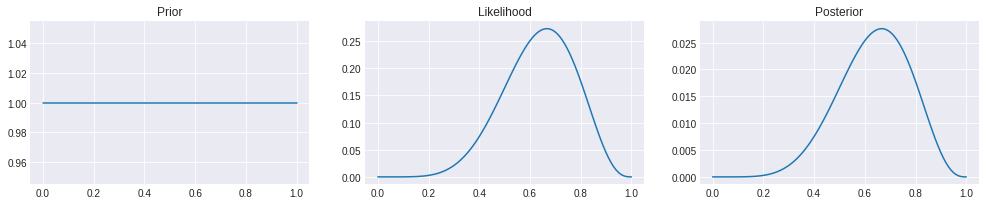

In [ ]:
prior1 = np.repeat(1, grid_points)  
posterior1 = computePosterior(likelihood, prior1)

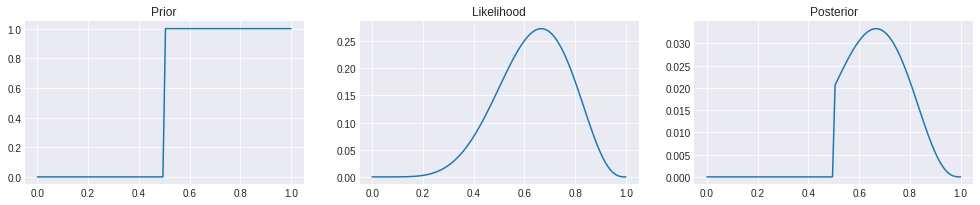

In [ ]:
prior2 = (p_grid >= 0.5).astype(int)
posterior2 = computePosterior(likelihood, prior2)

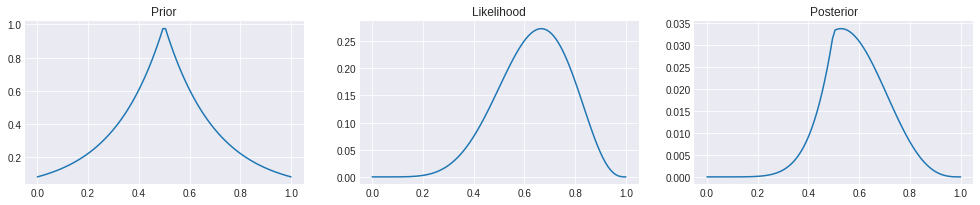

In [ ]:
prior3 = np.exp(- 5 * abs(p_grid - 0.5)) 
posterior3 = computePosterior(likelihood, prior3)


In [ ]:
##############################################
# the Monte Carlo method - compute pi
##############################################

In [ ]:
def in_circle(x, y, r):
    return math.sqrt(x **2 + y**2) <= r**2

In [ ]:
def approx_pi(r, n):
    
    xs, ys, cols = [], [], []
    
    count = 0
    
    for i in range(n):
        x = np.random.uniform(0,r,1)
        y = np.random.uniform(0,r,1)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("red")
        else:
            cols.append("steelblue")
            
    pi_appr = round(4 * count/n, 3)
    
    plt.figure(figsize=(3, 3))
    plt.scatter(xs, ys, c = cols, s=2)
    plt.title("pi (approximately) = " + str(pi_appr))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    return pi_appr

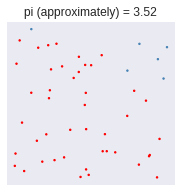

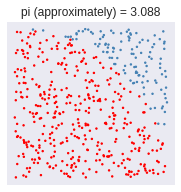

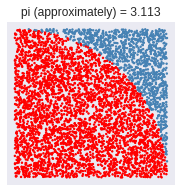

In [ ]:
r = 1

for n in 5*10**np.array([1,2,3]):
    approx_pi(r, n)

In [ ]:
##############################################
# the Monte Carlo method - integration
##############################################

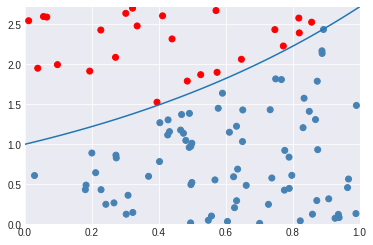

In [ ]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e

cols = ['steelblue'] * 100
for i in range(100):
    if pts[i,1] > np.exp(pts[i,0]):     # acceptance / rejection step
        cols[i] = 'red'
    
plt.scatter(pts[:, 0], pts[:, 1], c = cols)
plt.xlim([0,1])
plt.ylim([0, np.e]);


In [ ]:
# Monte Carlo approximation

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n    
    print('%10d %.6f' % (n, sol))


        10 1.902797
       100 1.603786
      1000 1.720672
     10000 1.727468
    100000 1.712817
   1000000 1.719270
  10000000 1.718328
 100000000 1.718329


In [ ]:
##############################################
# coin tossing
##############################################

n = 10
h = 6
p = h/n
print(p)

0.6


In [ ]:
a, b = 10, 10                   # hyperparameters
prior = stats.beta(a, b)        # prior
post = stats.beta(h+a, n-h+b)   # posterior

In [ ]:
def beta_binomial(n, h, a, b):
    # frequentist
    p = h/n
    rv = stats.binom(n, p)
    mu = rv.mean()
    
    # Bayesian
    prior = stats.beta(a, b)
    post = stats.beta(h+a, n-h+b)
    
    thetas = np.linspace(0, 1, 200)
    plt.figure(figsize=(8, 6))
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label='Likelihood', c='green')
    plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
    plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
    plt.xlim([0, 1])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

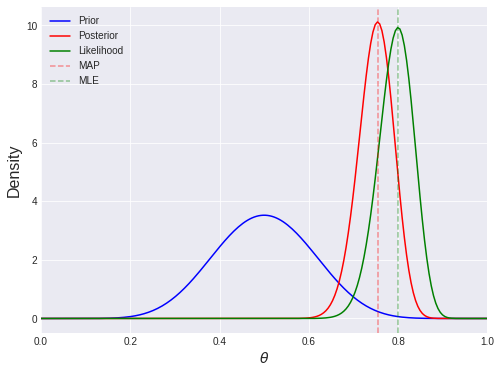

In [ ]:
beta_binomial(100, 80, 10, 10)

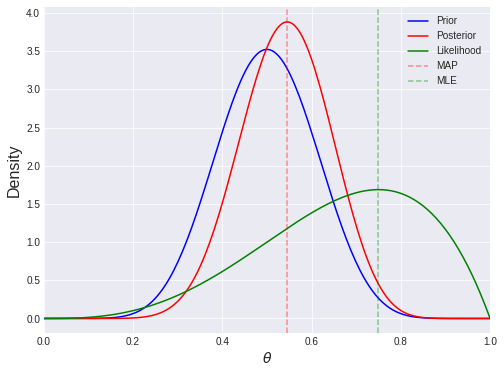

In [ ]:
beta_binomial(4, 3, 10, 10)

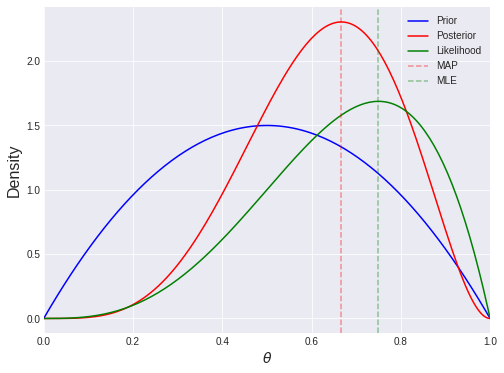

In [ ]:
beta_binomial(4, 3, 2, 2)

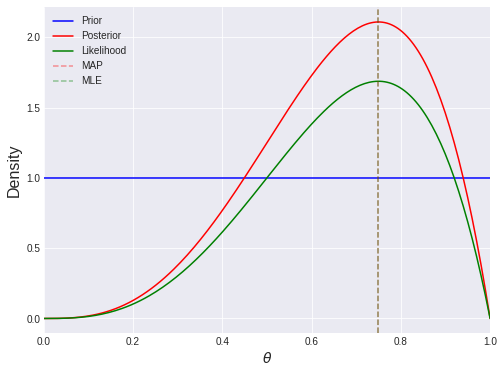

In [ ]:
beta_binomial(4, 3, 1, 1)

In [ ]:
##############################################
# Metropolis-Hastings
##############################################


In [ ]:
def target(likelihood, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)


In [ ]:
n = 100
h = 61
a = 10
b = 10
likelihood = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

In [ ]:
naccept = 0
theta = 0.1
niters = 10000

samples = np.zeros(niters+1)
samples[0] = theta

for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta

In [ ]:
nmcmc = len(samples)//2
print("Portion of accepted steps = " + str(naccept/niters))

Portion of accepted steps = 0.1765


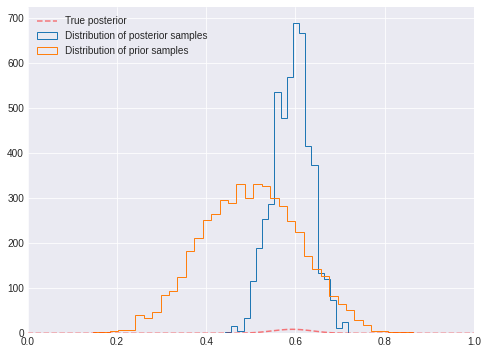

In [ ]:
post = stats.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)

plt.figure(figsize=(8, 6))
#plt.hist(samples[nmcmc:], 20, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(samples[nmcmc:], 20, histtype='step', linewidth=1, label='Distribution of posterior samples');
#plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step',  linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

In [ ]:
## Convergence diagnostics

def mh_coin(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + stats.norm(0, sigma).rvs()
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)
        
    return samples


In [ ]:

n = 100
h = 61
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.05
niters = 100

In [ ]:
chains = [mh_coin(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

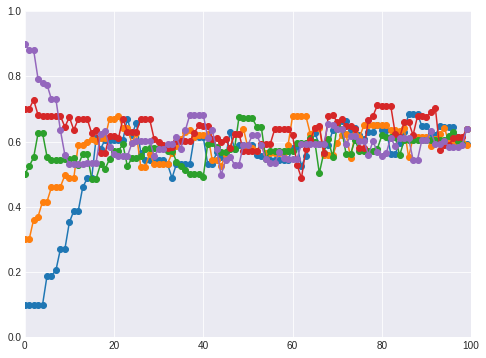

In [ ]:
plt.figure(figsize=(8, 6))

for chain in chains:
    plt.plot(chain, '-o')
    
plt.xlim([0, niters])
plt.ylim([0, 1]);

# Probabilistic programming languages (PPLs)

### 1st generation: Bugs, WinBugs, Jags, etc.

- Inference engine based on Monte Carlo methods.

- They did not scale to large data samples/high-dimensional models.

### 2nd generation: Infer.net, Factorie, Amidst, etc.

- Inference engine based on message passage algorithms and/or variational
inference methods.

- They did scale to large data samples/high-dimensional models.

- Restricted probabilistic model family (i.e. factor graphs, conjuage exponential family, etc.)

### 3rd generation: Stan, TensorFlow Probability, PyMC3, Pyro, Numpyro, Turing.jl, NIMBLE, Edward, InferPy, etc

- Hamiltonian Monte-Carlo, Black Box Variational Inference, etc

- They did scale to large data samples/high-dimensional models.

- Enable probabilistic models with deep neural networks:
  - Rely on deep learning frameworks (TensorFlow, Pytorch, Theano, etc).
  - Specialized hardware like GPUs, TPUs, etc.
  - Automatic differentiation methods.


## Pyro (www.pyro.ai)

PyRo demo: https://colab.research.google.com/drive/1Wkc8izTsjCrUrNwKKQL4K9uSxDIaPZWp?usp=sharing

In [ ]:
!pip install -q --upgrade pyro-ppl torch
import pyro
import torch
import pyro.distributions as dist
print(pyro.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 10.5 MB/s eta 0:00:00


## Pyro's dstributions:

https://docs.pyro.ai/en/stable/distributions.html

In [ ]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)

In [ ]:
sample = normal.sample()
sample

tensor(0.0809)

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[-1.2272,  1.5212, -0.6856,  0.7903,  0.1846],
         [-0.4522, -0.9539,  1.6032,  0.9115,  0.2631],
         [ 0.9701, -0.3611, -0.7028, -0.4436,  0.1694],
         [ 0.2884, -0.7853, -1.2712,  0.0730, -0.0074]],

        [[ 1.1059, -0.1444, -0.6553,  1.4275, -0.0083],
         [-0.4780, -0.9330,  0.4028,  0.3209,  2.3779],
         [ 2.2953, -0.0350,  0.4410,  2.3408, -0.5522],
         [-0.7647, -0.9581, -0.7506, -0.6091,  2.1332]],

        [[-0.6203, -0.2202,  0.4427, -0.7245, -0.5619],
         [ 0.2463,  0.2869,  0.4017,  0.2381,  0.0977],
         [ 0.4195, -0.0357,  0.6302,  0.6279, -1.3116],
         [-0.8081, -1.0787, -0.4004,  0.1381,  0.5501]]])

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])

In [ ]:
normal.log_prob(sample)

tensor([[[-3.3391, -1.7699, -1.1304, -0.9198, -0.9715],
         [-1.1488, -3.1719, -0.9412, -0.9190, -0.9669],
         [-1.8844, -1.8815, -0.9454, -0.9204, -1.6960],
         [-0.9218, -1.0407, -1.0135, -1.0081, -0.9365]],

        [[-0.9505, -3.3676, -3.8993, -0.9472, -4.7839],
         [-2.2524, -1.1919, -1.0217, -1.0136, -1.9827],
         [-1.1424, -0.9752, -1.6615, -0.9201, -1.5768],
         [-1.5859, -1.4102, -1.2472, -1.9468, -1.0199]],

        [[-1.0508, -1.1021, -4.0985, -0.9405, -1.5348],
         [-3.9192, -1.5036, -0.9280, -4.5873, -2.3987],
         [-2.0659, -1.1082, -2.0038, -1.4497, -1.4120],
         [-0.9204, -0.9228, -1.0726, -0.9334, -1.0629]]])

In [ ]:
torch.sum(normal.log_prob(sample))

tensor(-97.4391)

In [ ]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [ ]:
normal.sample()

tensor([0.7239, 3.9519, 2.1797])

In [ ]:
normal.log_prob(normal.sample())

tensor([-1.1095, -1.2554, -1.3709])

## Pyro's models:

https://pyro.ai/examples/intro_long.html